# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#Обучение-без-учителя,-понижение-размерности,-кластеризация" data-toc-modified-id="Обучение-без-учителя,-понижение-размерности,-кластеризация-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обучение без учителя, понижение размерности, кластеризация</a></div><div class="lev3 toc-item"><a href="#Иерархическая-кластеризация:-Пищевая-ценность-продуктов" data-toc-modified-id="Иерархическая-кластеризация:-Пищевая-ценность-продуктов-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Иерархическая кластеризация: Пищевая ценность продуктов</a></div><div class="lev2 toc-item"><a href="#DBSCAN:-Геоданные" data-toc-modified-id="DBSCAN:-Геоданные-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>DBSCAN: Геоданные</a></div><div class="lev3 toc-item"><a href="#Отток-в-игре:-PCA-+-RFE" data-toc-modified-id="Отток-в-игре:-PCA-+-RFE-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Отток в игре: PCA + RFE</a></div><div class="lev3 toc-item"><a href="#Сжатие-признаков-для-визуализации" data-toc-modified-id="Сжатие-признаков-для-визуализации-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Сжатие признаков для визуализации</a></div><div class="lev3 toc-item"><a href="#RFE-+-Decision-tree" data-toc-modified-id="RFE-+-Decision-tree-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>RFE + Decision tree</a></div>

# Skillfactory - Практический Machine Learning
## Обучение без учителя, понижение размерности, кластеризация

<center> Шестаков Андрей </center>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [160]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, IntSlider, fixed, FloatSlider

### Иерархическая кластеризация: Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

In [4]:
df = pd.read_csv('data/food.txt', sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


* Подготовте данные к кластеризации 
    * Выделите признаки в матрицу X (numpy array)
    * Отнормируйте признаки

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler_=StandardScaler(with_mean='warm')
scaler_.fit(df[['Energy', 'Protein', 'Fat', 'Calcium', 'Iron']])
X=scaler_.transform(df[['Energy', 'Protein', 'Fat', 'Calcium', 'Iron']])

* Произведите иерарническую кластеризацию этого набора данных (метод `linkage`)
* Выберите тип пересчета расстояния между кластерами с помощью кофенетической корреляции

In [13]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage, cophenet

In [14]:
names=np.array(df['Name'])
names

array(['Braised beef', 'Hamburger', 'Roast beef', 'Beefsteak',
       'Canned beef', 'Broiled chicken', 'Canned chicken', 'Beef heart',
       'Roast lamb leg', 'Roast lamb shoulder', 'Smoked ham',
       'Pork roast', 'Pork simmered', 'Beef tongue', 'Veal cutlet',
       'Baked bluefish', 'Raw clams', 'Canned clams', 'Canned crabmeat',
       'Fried haddock', 'Broiled mackerel', 'Canned mackerel',
       'Fried perch', 'Canned salmon', 'Canned sardines', 'Canned tuna',
       'Canned shrimp'], dtype=object)

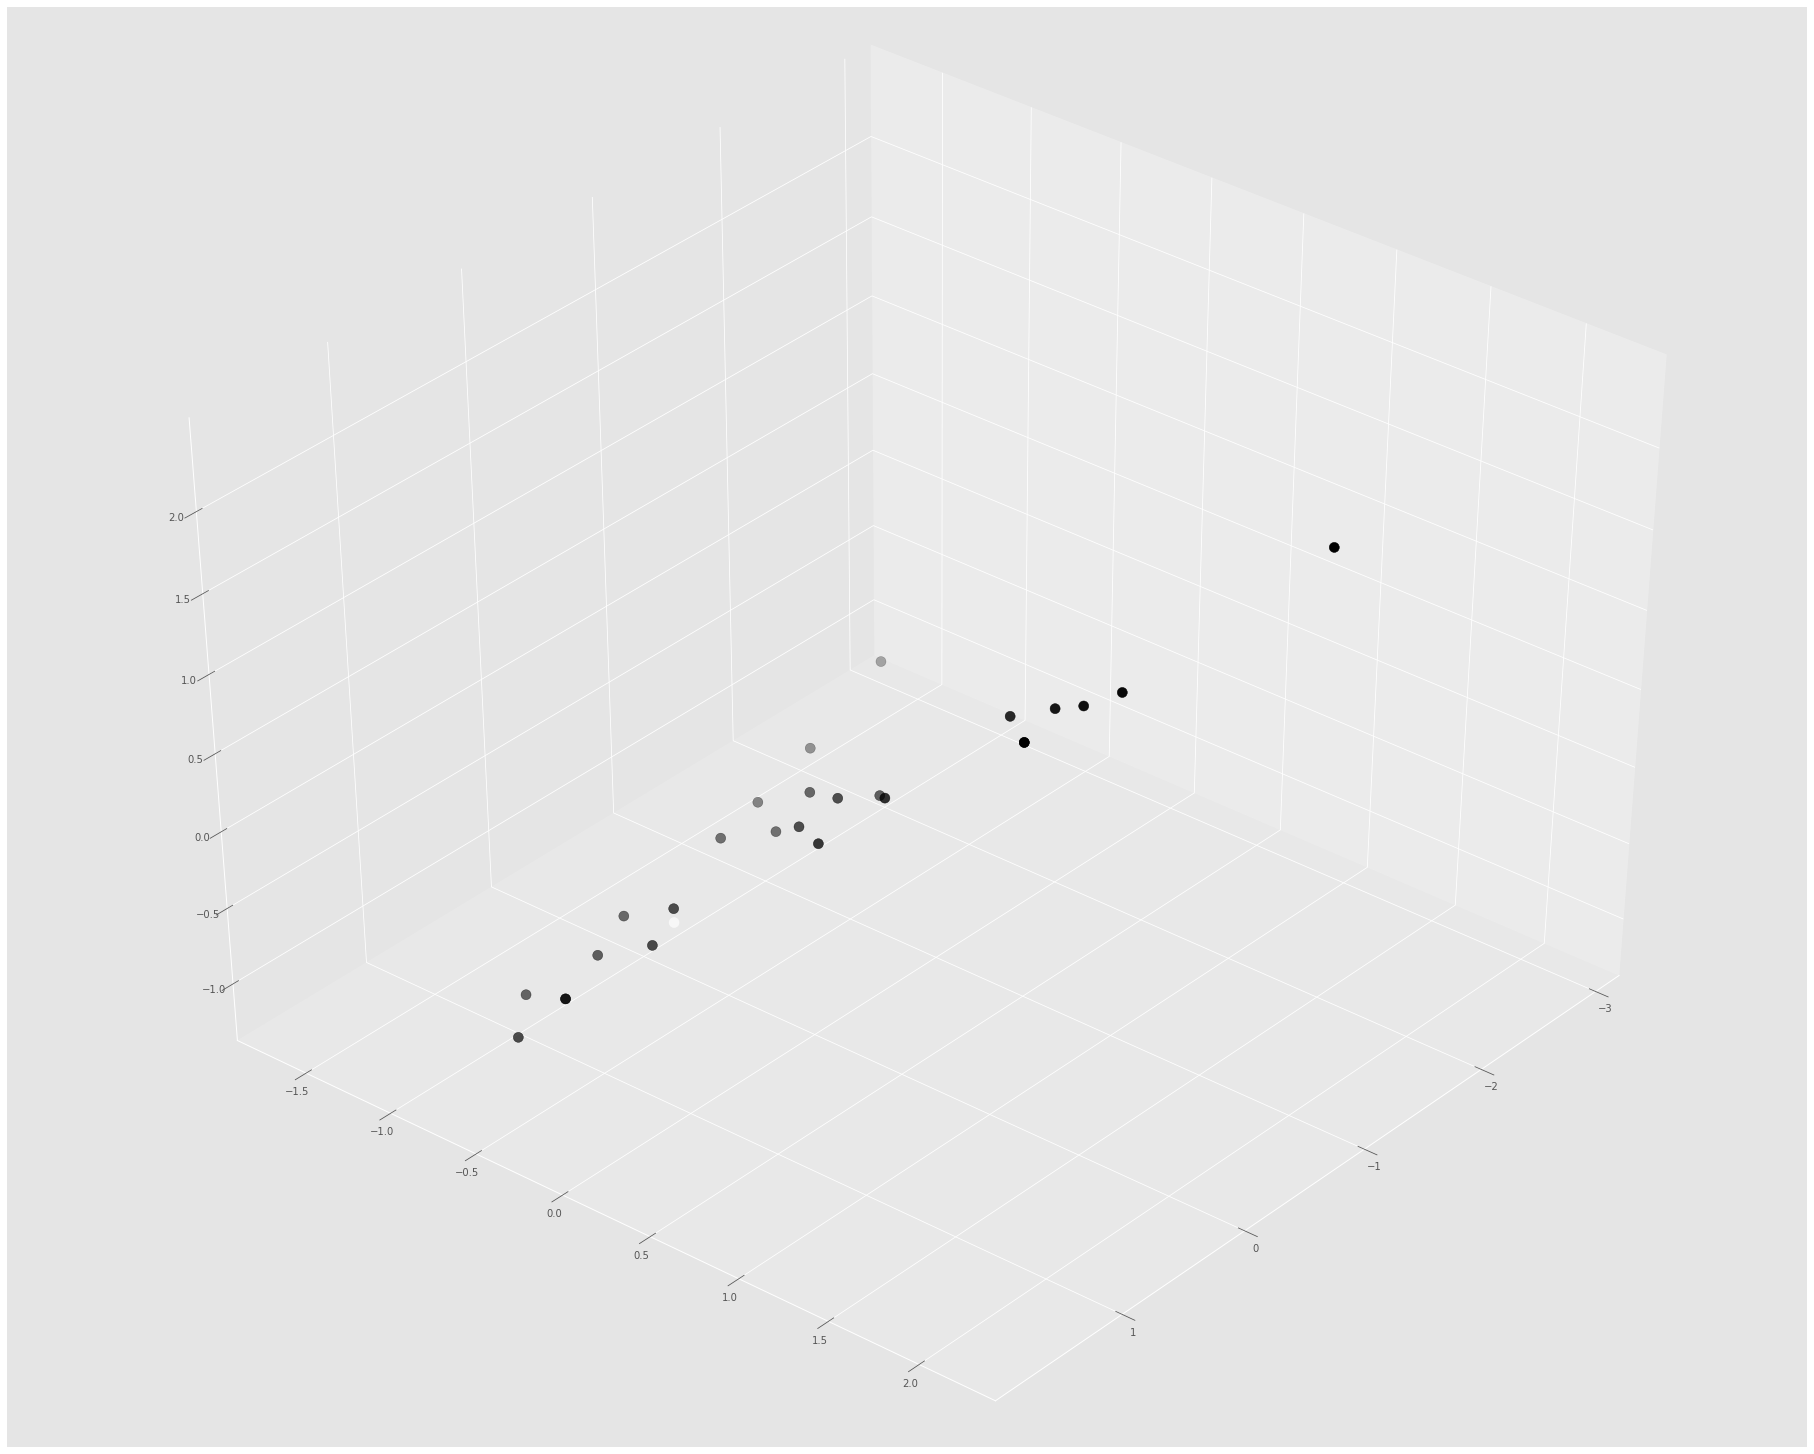

In [15]:
Z = linkage(X, method='average', metric='euclidean')

labels = fcluster(Z, 2, criterion='maxclust')
    
# fig = plt.figure(figsize=(25, 10))
# plt.scatter(X[:,0], X[:,1], c=labels)
# plt.xlabel('$x_1$')
# plt.ylabel('$x_2$')

# plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(40, figsize=(25, 20))
ax = Axes3D(fig, elev=40, azim=40)
ax.scatter(X[:, 1], X[:, 0], X[:, 2], c=labels,
            cmap=plt.cm.gist_stern, s=100)

plt.show()

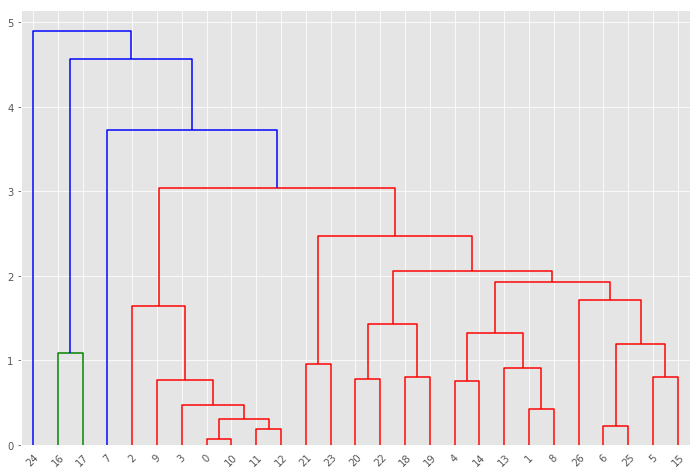

In [16]:
_ = dendrogram(Z)


$ \text d(u,v) = \sqrt{\frac{|v|+|s|}
                           {T}d(v,s)^2
                    + \frac{|v|+|t|}
                           {T}d(v,t)^2
                    - \frac{|v|}
                           {T}d(s,t)^2}$<br>

* Изобразите дендрограмму
    * Сначала просто посмотрите на результат метода `dendrogram`
    * Сделаем визуализацию более наглядной:
        * Выделите названия продуктов в numpy array c названием `names`
        * Выполните `dendrogram`  аргументами `orientation='left'`, `labels=names`
        * Теперь мы должны увидеть, что дендрограмма транспонировалась и вместо безымянных индексов мы имеем наименования объектов

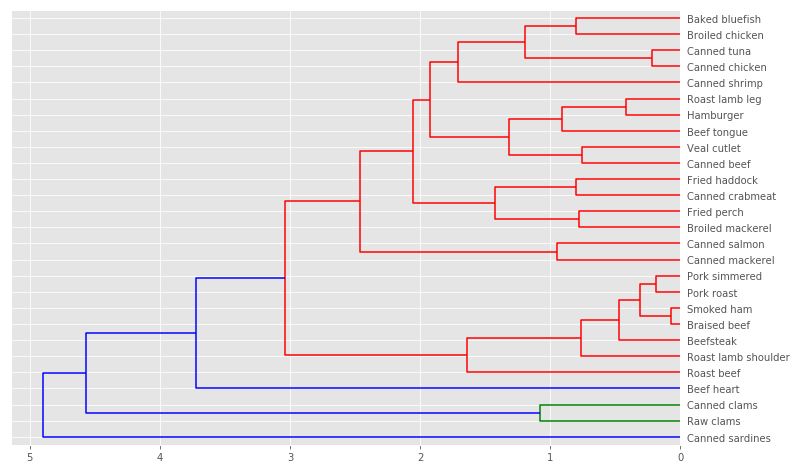

In [17]:
_ = dendrogram(Z,orientation='left', labels=names)

* Выделите кластеры по дендрограмме с помощью метода `fcluster`
    * Наличие кластеров, состоящих из одного объекта - нормальное явление, если это можно объяснить

In [18]:

labels = fcluster(Z, 5, criterion='maxclust')

for c in list(set(labels)):
    print(c)
    for i, a in enumerate(names):
        if labels[i]==c:
            print(a)
  

1
Raw clams
Canned clams
2
Braised beef
Roast beef
Beefsteak
Roast lamb shoulder
Smoked ham
Pork roast
Pork simmered
3
Hamburger
Canned beef
Broiled chicken
Canned chicken
Roast lamb leg
Beef tongue
Veal cutlet
Baked bluefish
Canned crabmeat
Fried haddock
Broiled mackerel
Canned mackerel
Fried perch
Canned salmon
Canned tuna
Canned shrimp
4
Beef heart
5
Canned sardines


## DBSCAN: Геоданные

In [19]:
# Опционально, установите установите matplotlib.basemap
# Либо закоментируйте команду ниже
# import mpl_toolkits.basemap as bm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Загрузите геоданные из `geo_data.txt` (lat, lon).

Будем пытаться кластеризовать данные с помощью DBSCAN и меры [haversine](https://en.wikipedia.org/wiki/Haversine_formula)

In [20]:
df_geo = pd.read_csv('data/geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

In [21]:
df_geo.head()

,lat,lon
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [22]:
df_geo.describe

<bound method NDFrame.describe of            lat      lon
0      62.5983  29.7439
1      62.6146  29.7440
2      62.6144  29.7456
3      62.6004  29.7394
4      62.6018  29.7437
5      62.6038  29.7518
6      62.6022  29.7440
7      62.6027  29.7472
8      62.6021  29.7440
9      62.6070  29.7485
10     62.5962  29.7276
11     62.6019  29.7437
12     62.5978  29.7249
13     62.5968  29.7485
14     62.6017  29.7441
15     62.5981  29.7481
16     62.6021  29.7439
17     62.5975  29.7482
18     62.6019  29.7440
19     62.5991  29.7464
20     62.5994  29.7461
21     62.5987  29.7485
22     61.4736  23.8677
23     61.4544  23.8485
24     62.6142  29.7433
25     62.5908  29.7411
26     62.5919  29.7426
27     62.5904  29.7404
28     62.5910  29.7417
29     62.5902  29.7402
...        ...      ...
13437  62.5980  29.7429
13438  62.5984  29.7445
13439  62.6036  29.7453
13440  62.5990  29.7426
13441  62.5984  29.7434
13442  62.6151  29.7438
13443  62.6154  29.7442
13444  62.6146  29.7435
13445 

In [23]:
def plot_geo(lat, lon, labels=None):    
    try:
        lllat, lllon = lat.min()-1, lon.max()+1
        urlat, urlon = lat.max()+1, lon.min()-1

        plt.figure(figsize=(10, 10))

        m = bm.Basemap(
            llcrnrlon=lllon,
            llcrnrlat=lllat,
            urcrnrlon=urlon,
            urcrnrlat=urlat, 
            projection='merc',
            resolution='h'
        )

        m.drawcoastlines(linewidth=0.5)
        m.drawmapboundary(fill_color='#47A4C9', zorder=1)
        m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

        parallels = np.linspace(lllat, urlat, 10)
        m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        # draw meridians
        meridians = np.linspace(urlon, lllon, 10)
        m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

        m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
              zorder=3, lw=0, c=labels)
    except:
        print('что-то пошло не так')
        plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
        plt.axis('equal')

Для начала нарисуем все точки на карте

что-то пошло не так


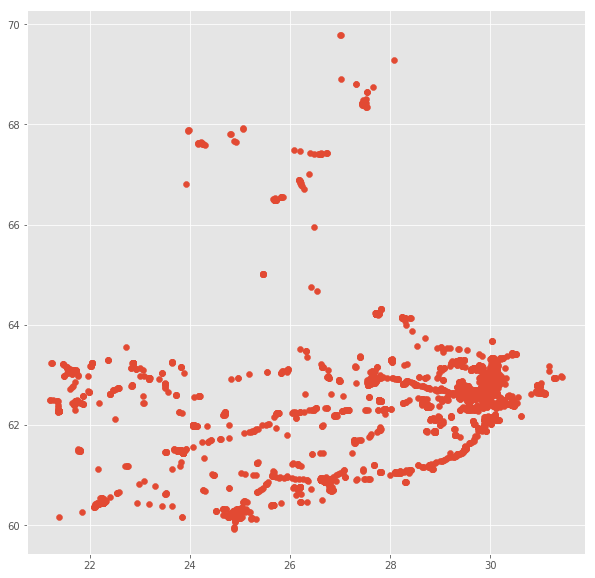

In [24]:
plot_geo(df_geo.loc[:, 'lat'].values, df_geo.loc[:, 'lon'].values)

Это данные с check-in людей в foursquare. В данных могут быть ошибки и просто непопулярные заведения.

Мы будем использовать расстояние haversine - на входе требуются координаты в **радианах**. Выход тоже будет в радианах. Чтобы перейти от градусов в радианты мы можем вспомнить тригонометрию, а можем воспользоваться функцией `np.radians`.

Для кого, чтобы не терять связь с реальностью, будем иметь ввиду, что расстояние в 1 радиан на земном шаре равно примерно 6371.0088 километрам.

Создайте матрицу X с координатами в радианах

In [25]:
km_in_radian = 6371.0088
X = np.radians(df_geo.values)

Как же определить, какие параметры для DBSCAN выставлять? Наибольшую проблемы представляет параметр eps.

Будем считать, что MinPts нам дан свыше  например для себя мы определили, что кластером будет считаться группа из **минимум** 20 точек - MinPts = 20). Воспользуемся следующим способом оценки:

* Расчитайте расстояние до k=MinPts ближайшего соседа каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируйте полученный массив и выведите его на график
* По графику будет примерно понятно, сколько точек уйдет в шум, а сколько попадет в полноценный кластер при всевозможных `eps`
* Выберите eps, при котором график начинает "уходить вверх" (примерно 0.02-0.06, если все было сделано верно)

In [26]:
len(X)


13467

In [27]:
MinPts = 20
nn = NearestNeighbors()
nn.fit(X)
dist, num= nn.kneighbors(X,n_neighbors=MinPts, return_distance=True) 
neighbours=[]
for i_ in range(len(X)):
    neighbours.append(np.max(dist[i_][0:MinPts]))

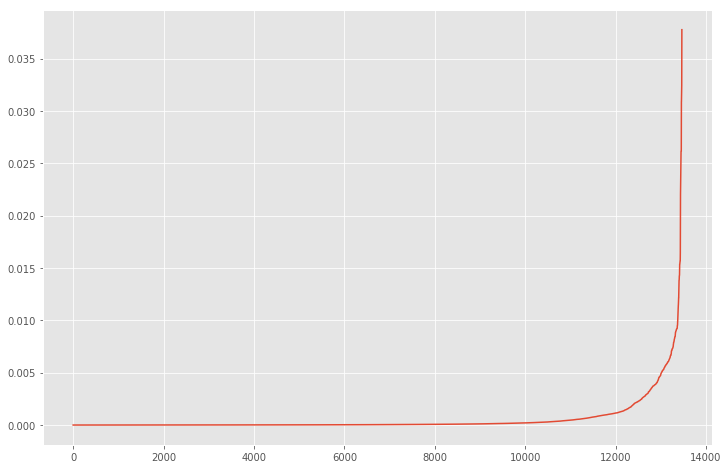

In [28]:
neighbours=sorted(neighbours)
fig, ax = plt.subplots()
ax.plot(range(len(neighbours)), neighbours)
plt.show()

In [29]:
 from tqdm import tqdm

Определим eps мы можем начать кластеризацию

* Создайте экземпляр класса DBSCAN, кластеризуйте данные
* Выведите полученные метки кластеров и их частоты
* Интерпретировать кластеры может оказаться затруднительно, но можно избавить от выборов и посмотреть на результат
    * Изобразите координаты точек, не попавших в кластер выбросов (метка -1) 

In [30]:
db=DBSCAN(eps=0.005, min_samples=5)
db_clusters=db.fit_predict(X)

In [31]:
# clusters=pd.DataFrame(data=[], columns=['cluster','pow'])
clusters=[]
for i_ in range(db_clusters.ptp()+1):
    clusters.append([i_-1, len(db_clusters[db_clusters==i_-1])/len(db_clusters)])
clusters=pd.DataFrame(data=clusters, columns=['cluster','pow'])

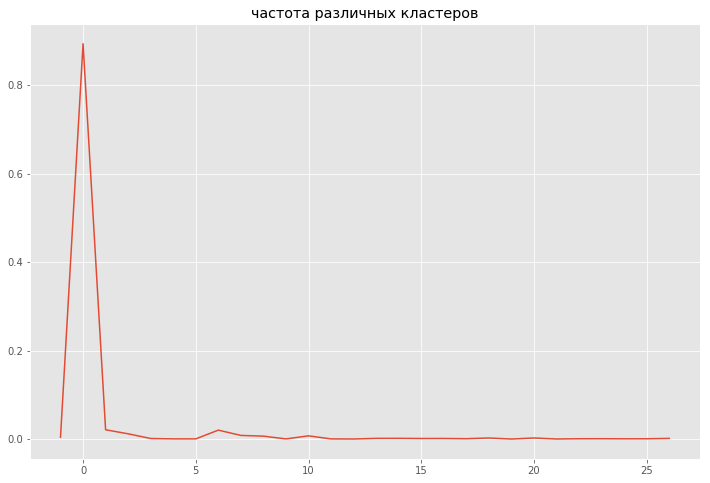

In [32]:
fig, ax = plt.subplots(sharex=True, sharey=True)
ax.plot( clusters['cluster'], clusters['pow'] )
ax.set_title('частота различных кластеров')
plt.show()

что-то пошло не так


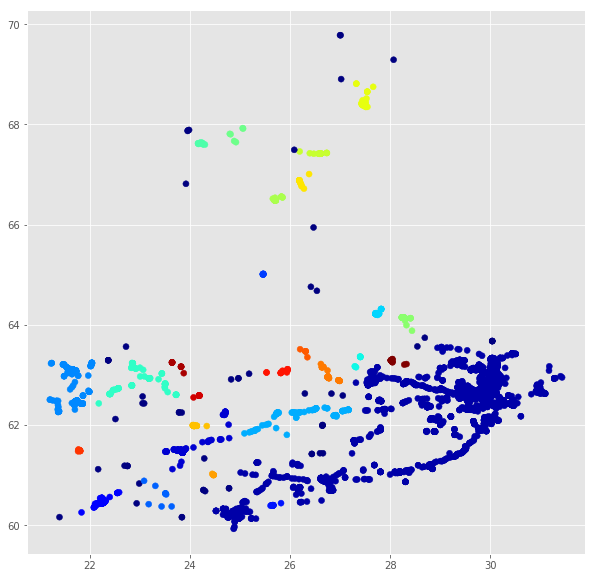

In [33]:
plot_geo(df_geo.loc[:, 'lat'].values, df_geo.loc[:, 'lon'].values, labels=db_clusters)
# ax=pd.DataFrame(X).plot.scatter(x=0, y=1, c=db_clusters, cmap=plt.cm.Set1)

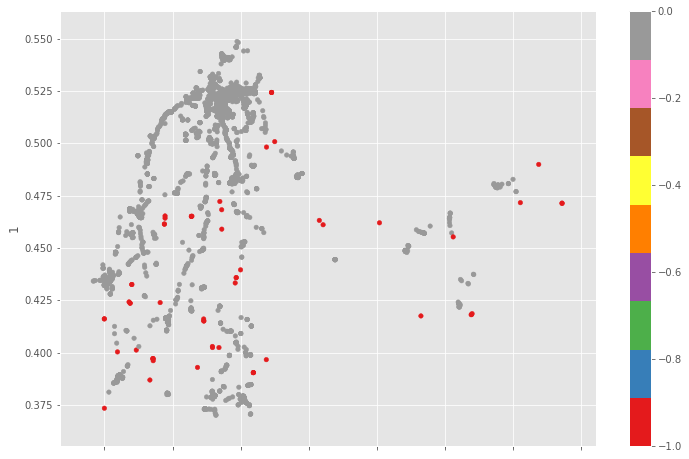

In [34]:
# Определяем выбросы - делим все точки на 2 типа - выбросы и НЕвыбросы и рисуем - видим что это точно выбросы.
db_clusters[db_clusters>=0]=0
ax=pd.DataFrame(X).plot.scatter(x=0, y=1, c=db_clusters, cmap=plt.cm.Set1)
# plot_geo(df_geo.loc[:, 'lat'].values, df_geo.loc[:, 'lon'].values, labels=db_clusters1)

### Отток в игре: PCA + RFE

В этих данных предлагается построить модель оттока игрока из игрового проекта

Целевой мерой является `log_loss` - чем меньше значение, тем лучше. Для того, чтобы считать `log_loss`, например в `cross_val_score`, необходимо выставить `scoring=neg_log_loss`. Тогда на выходе вы получите **отрицательный** log_loss, который, соответственно, надо максимизировать

In [36]:
import seaborn as sns

In [37]:
df_X = pd.read_csv('data/x_train.csv', sep=';')
df_y = pd.read_csv('data/y_train.csv', names=['target'])

In [38]:
df = df_X.join(df_y)

In [39]:
df.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,target
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2,0
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4,1
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1,0


Для начала визуализируйте графики со всеми парами исходных признаков с помощью `sns.pairplot` с раскраской по целевой переменной `target`.

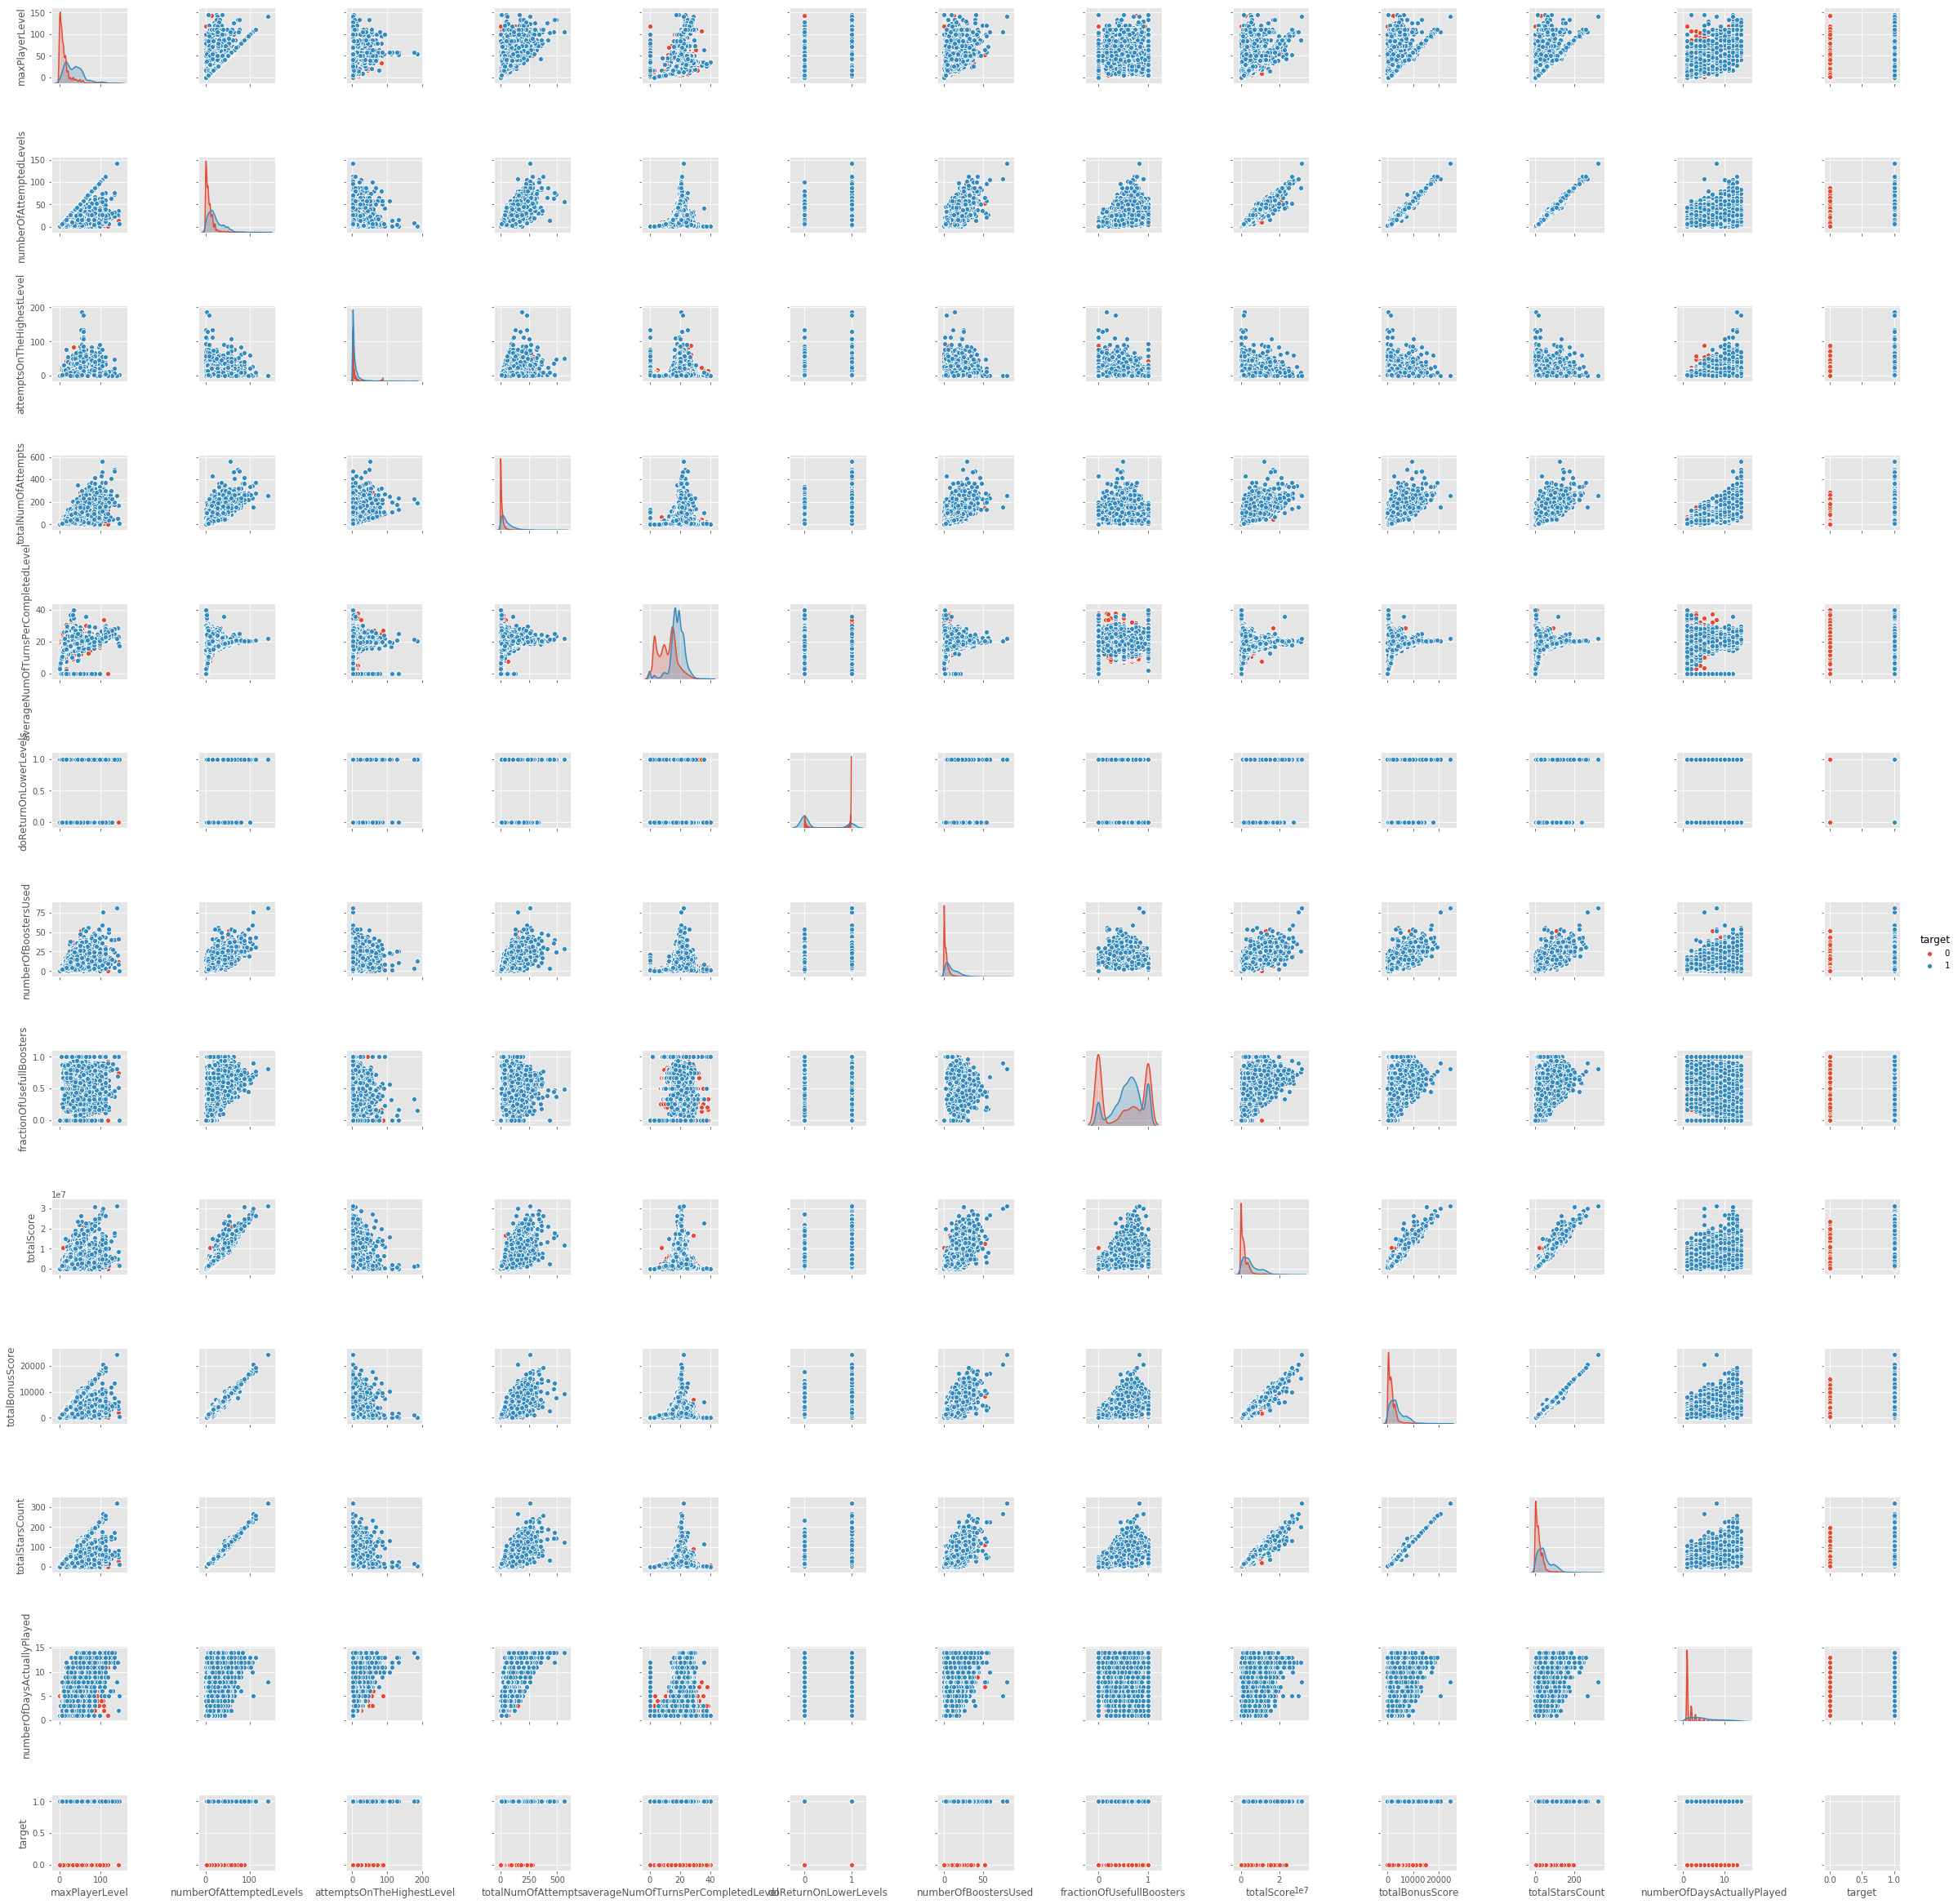

In [41]:
sns.pairplot(df, hue='target')

### Сжатие признаков для визуализации

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Составьте pipeline, в котором
* Признаки будут нормироваться
* Будет выполняться `PCA` преобразование на 3 компоненты

In [45]:
model_ = Pipeline([
    ('scal', StandardScaler()),
    ('pca', PCA(n_components=3))
])

Обучите pipeline на данных (без целевой переменной)

In [214]:
result_=model_.fit_transform(df_X )

Какую **суммарную долю** исходной дисперсии содержат в себе полученные компоненты?

In [240]:
# прочие параметры модели – функция имеет ряд атрибутов, позволяющих получить доступ к промежуточным переменным:

# — Вектор средних: mean_ 
# — Вектор(матрица) проекции: components_
# — Дисперсии осей проекции (выборочная): explained_variance_
# — Доля информации (доля от общей дисперсии): explained_variance_ratio_

model_.named_steps.pca.explained_variance_ratio_


array([0.61581346, 0.1215063 , 0.08630263])

Изобразите сжатые данные в пространстве перых двух компонент. Раскрасте точки в цвет "класса".

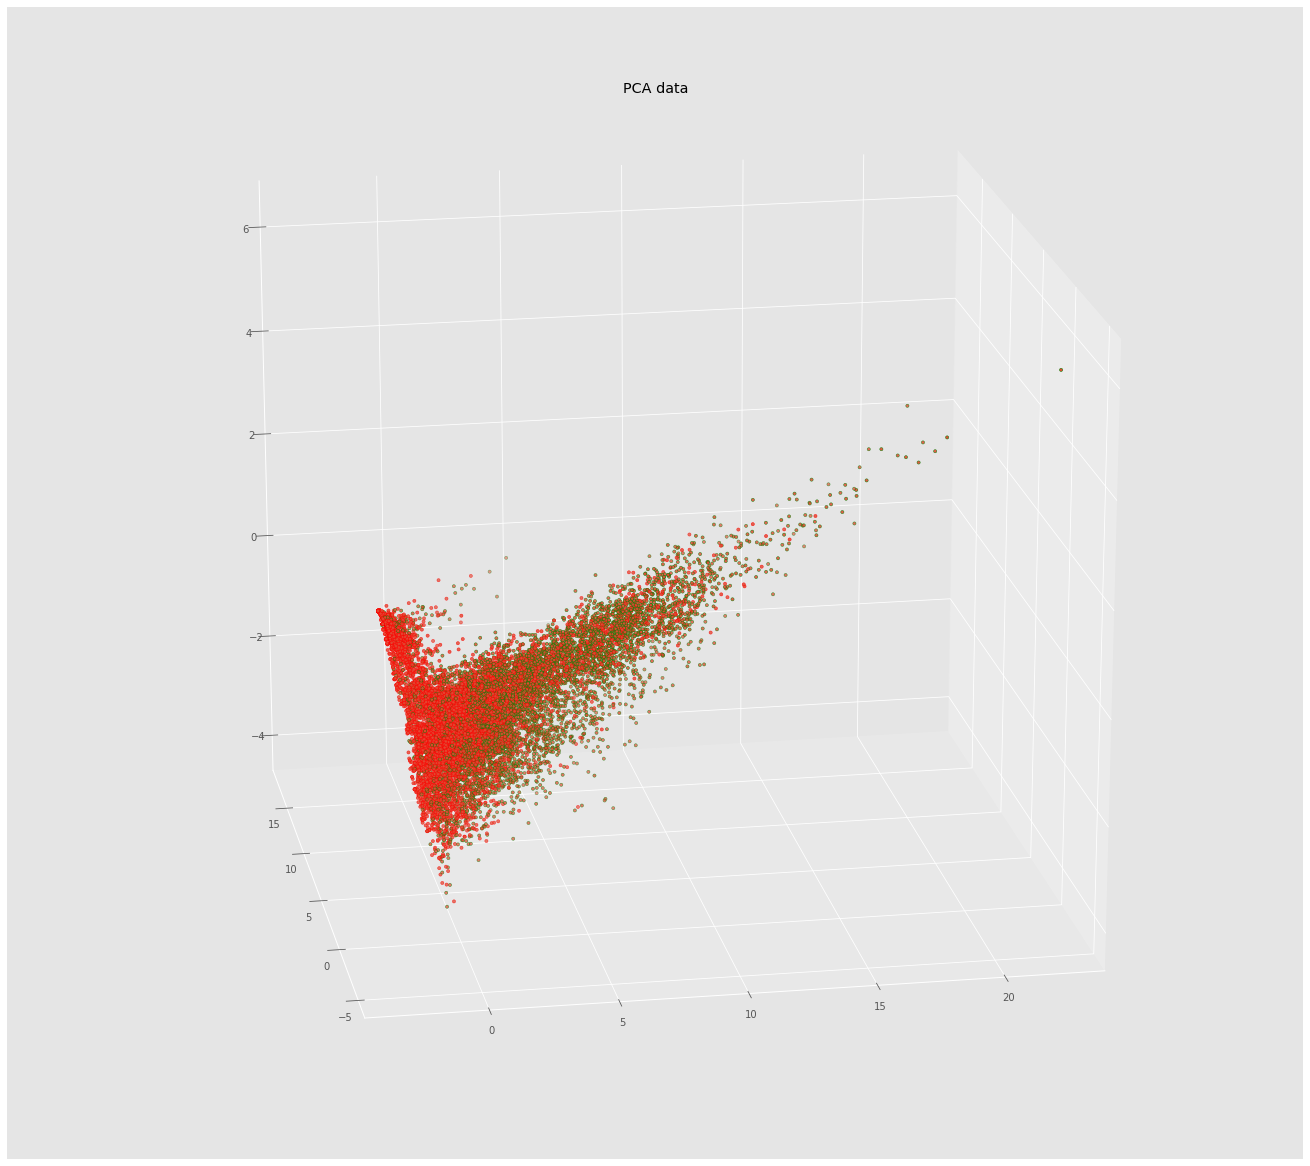

In [224]:
def f_(x):
    if x==0:
        return 'r'
    else:
        return'g'

fig = plt.figure(1, figsize=(18, 16))

ax = Axes3D(fig, elev=20, azim=260)
ax.scatter(result_[:, 0], result_[:, 1], result_[:, 2], 
           cmap=plt.cm.Set1, edgecolor=df_y['target'].apply(f_)
           , s=10)
ax.set_title("РСА data")

plt.show()

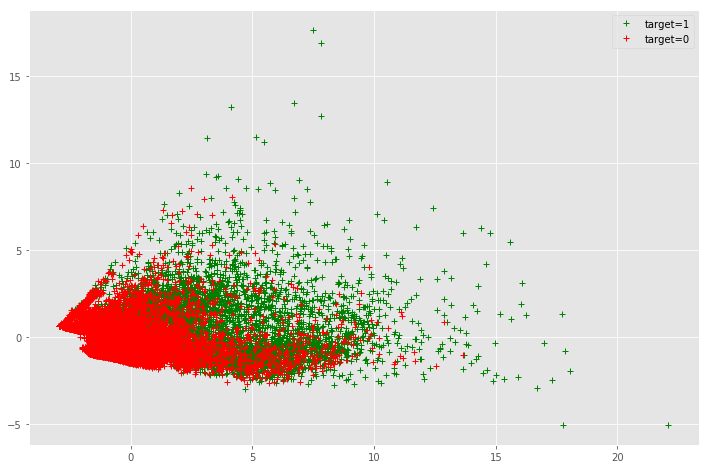

In [110]:
plt.plot(result_[df_y['target']==1,0],result_[df_y['target']==1,1],'g+', label='target=1')
plt.plot(result_[df_y['target']==0,0],result_[df_y['target']==0,1],'r+', label='target=0')
plt.legend()

### RFE + Decision tree

In [162]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

Составьте модель, которая будет состоять из дерева решений, обернутое в RFECV
* Задайте схему кроссвалидации StratifiedKFold с 5 фолдами, перемешиванием и фиксированным random_state
* Для RFECV укажите scoring='neg_log_loss' и в параметр cv передайте схему из пункта выше

In [207]:
from sklearn.model_selection import StratifiedKFold, KFold
cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

def list2str(list_):
    r_=''
    for i_ in list_:
        r_=r_+str(i_)+' '
    return r_
        

* Обучите модель с разной максимальной глубиной дерева (от 3 до 7). 
* Для каждого значения глубины постройте график изменения качества модели в зависимости от количества признаков
* Для наилучшей настройки выведите название отобранных признаков

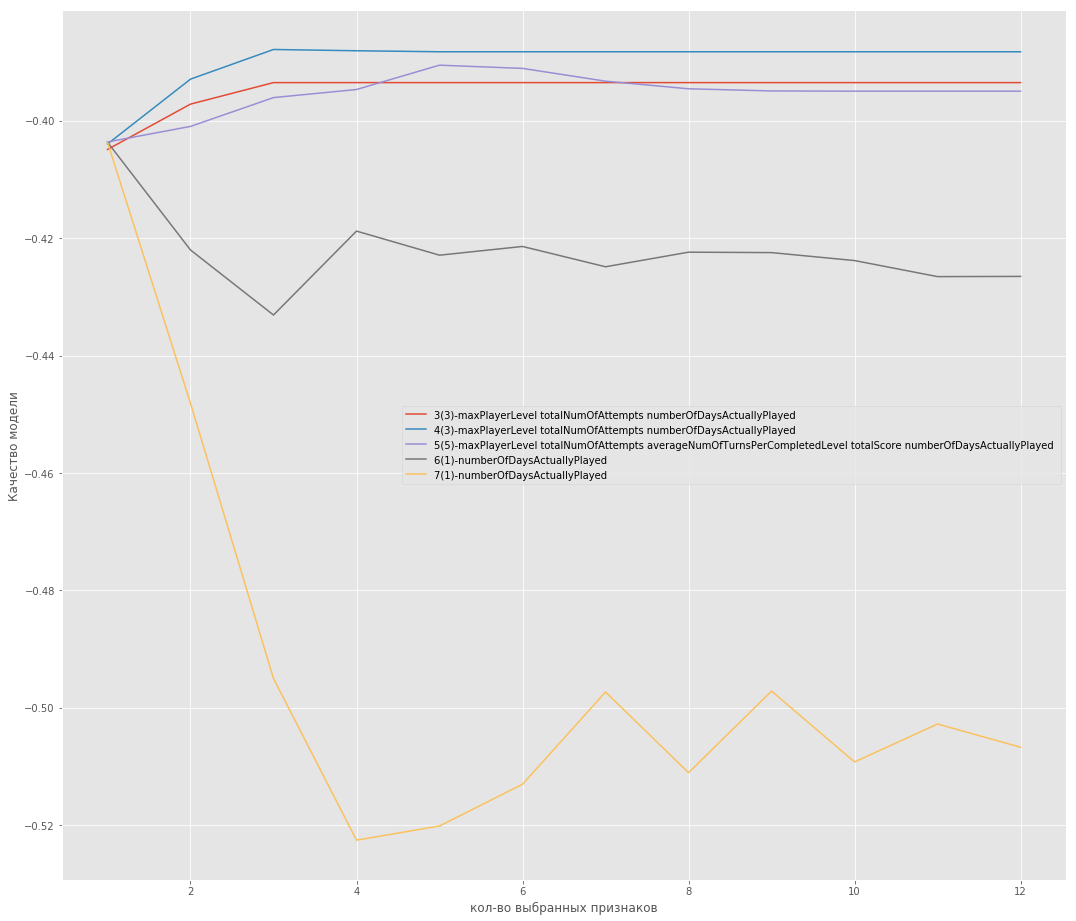

In [213]:
fig = plt.figure(1, figsize=(18, 16))
for depth_ in range(3,8):
    rfecv = RFECV(estimator=DecisionTreeClassifier(max_depth=depth_), step=1, cv=cv, scoring='neg_log_loss') 
    rfecv_=rfecv.fit(df_X,df_y)
    plt.plot(range(1, len(rfecv_.grid_scores_) + 1), rfecv.grid_scores_, label=str(depth_) + 
             '(' + str(rfecv_.n_features_) +')-' + list2str(df_X.columns[rfecv_.support_]))
plt.xlabel("кол-во выбранных признаков")
plt.ylabel("Качество модели")
plt.legend()
plt.show()

In [235]:
# легенда содержит <глубину дерева>(<кол-во признаков в максимуме>) <наименования признаков в максимуме> 